## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from pathlib import Path
from PIL import Image
import os
from skimage.io import imread
from skimage.transform import resize

## Loading Dataset

In [2]:
train_path = Path("dataset/Train")
test_path = Path("dataset/Test")

In [3]:
train_images = {}
for labels in train_path.iterdir():
    label = labels.name
    train_images[label] = []
    for img_p in labels.iterdir():
        train_images[label].append(img_p)

In [4]:
test_images = {}
for labels in test_path.iterdir():
    label = labels.name
    assert label not in test_images
    test_images[label] = []
    for img_p in labels.iterdir():
        test_images[label].append(img_p)

## Info of train dataset

In [5]:
print(f"{len(train_images)} classes in training set!")
print(f"{sum(len(cnt) for cnt in train_images.values())} images for training in total!")
print()
for label, imgs in train_images.items():
    print(f"{label}: {len(imgs)} images")

9 classes in training set!
2239 images for training in total!

actinic keratosis: 114 images
basal cell carcinoma: 376 images
dermatofibroma: 95 images
melanoma: 438 images
nevus: 357 images
pigmented benign keratosis: 462 images
seborrheic keratosis: 77 images
squamous cell carcinoma: 181 images
vascular lesion: 139 images


## Info of test dataset

In [6]:
print(f"{len(test_images)} classes in testing set!")
print(f"{sum(len(cnt) for cnt in test_images.values())} images for testing in total!")
print()
for label, imgs in test_images.items():
    print(f"{label}: {len(imgs)} images")

9 classes in testing set!
118 images for testing in total!

actinic keratosis: 16 images
basal cell carcinoma: 16 images
dermatofibroma: 16 images
melanoma: 16 images
nevus: 16 images
pigmented benign keratosis: 16 images
seborrheic keratosis: 3 images
squamous cell carcinoma: 16 images
vascular lesion: 3 images


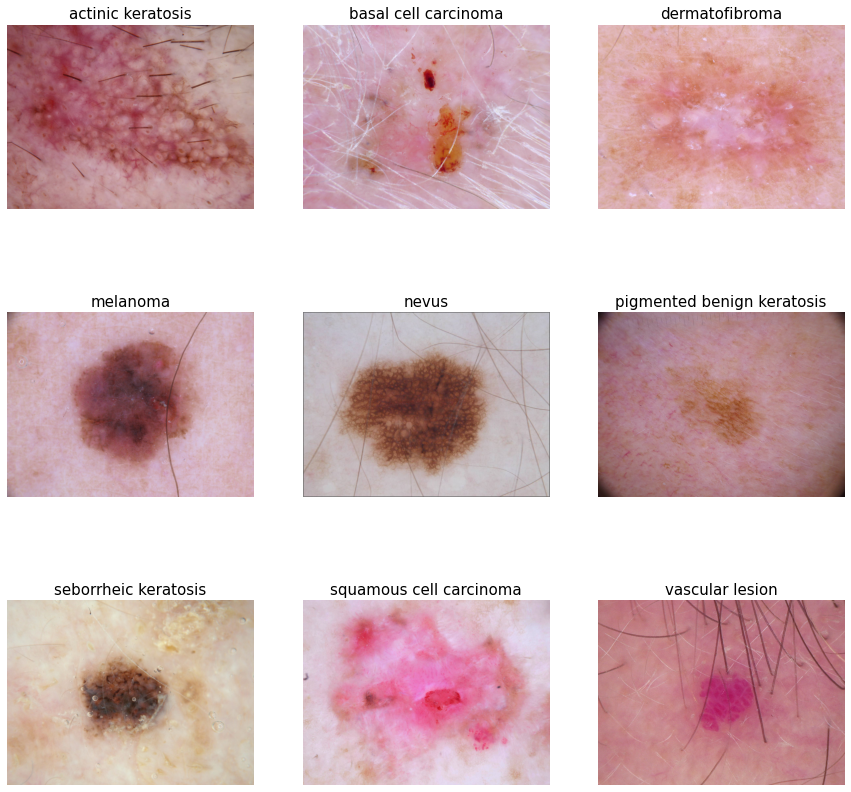

In [7]:
plt.figure(figsize=(15, 15))
for i, (label, imgs) in enumerate(train_images.items()):
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.imshow(Image.open(imgs[0]))
    plt.title(label, fontsize=15)

In [8]:
Categories=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
flat_data_arr=[]
target_arr=[]
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(train_path,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
train_data=pd.DataFrame(flat_data)
train_data['Target']=target
train_data

loading... category : actinic keratosis
loaded category:actinic keratosis successfully
loading... category : basal cell carcinoma
loaded category:basal cell carcinoma successfully
loading... category : dermatofibroma
loaded category:dermatofibroma successfully
loading... category : melanoma
loaded category:melanoma successfully
loading... category : nevus
loaded category:nevus successfully
loading... category : pigmented benign keratosis
loaded category:pigmented benign keratosis successfully
loading... category : seborrheic keratosis
loaded category:seborrheic keratosis successfully
loading... category : squamous cell carcinoma
loaded category:squamous cell carcinoma successfully
loading... category : vascular lesion
loaded category:vascular lesion successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.529412,0.294118,0.327451,0.539216,0.307843,0.333333,0.525490,0.282353,0.301961,0.492157,...,0.658824,0.466667,0.476471,0.660784,0.466667,0.470588,0.666667,0.470588,0.470588,0
1,0.443137,0.331373,0.337255,0.427451,0.317647,0.307843,0.360784,0.239216,0.215686,0.298039,...,0.623529,0.568627,0.568627,0.623529,0.568627,0.568627,0.623529,0.568627,0.568627,0
2,0.627451,0.443137,0.419608,0.643137,0.462745,0.441176,0.645098,0.462745,0.441176,0.656863,...,0.560784,0.376471,0.335294,0.570588,0.398039,0.366667,0.584314,0.433333,0.409804,0
3,0.656863,0.349020,0.366667,0.694118,0.401961,0.413725,0.727451,0.441176,0.450980,0.747059,...,0.501961,0.258824,0.258824,0.498039,0.252941,0.268627,0.488235,0.245098,0.264706,0
4,0.803922,0.600000,0.607843,0.805882,0.601961,0.609804,0.815686,0.621569,0.625490,0.823529,...,0.817647,0.619608,0.631373,0.815686,0.621569,0.631373,0.815686,0.625490,0.639216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,0.398039,0.309804,0.352941,0.452941,0.364706,0.398039,0.525490,0.427451,0.456863,0.568627,...,0.682353,0.543137,0.582353,0.654902,0.529412,0.562745,0.633333,0.507843,0.545098,8
2235,0.127451,0.098039,0.109804,0.145098,0.117647,0.121569,0.194118,0.145098,0.166667,0.249020,...,0.058824,0.045098,0.056863,0.050980,0.035294,0.041176,0.037255,0.027451,0.035294,8
2236,0.713725,0.572549,0.584314,0.719608,0.572549,0.588235,0.713725,0.570588,0.588235,0.727451,...,0.766667,0.631373,0.639216,0.772549,0.633333,0.649020,0.776471,0.635294,0.650980,8
2237,0.803922,0.670588,0.752941,0.807843,0.682353,0.756863,0.800000,0.684314,0.750980,0.788235,...,0.817647,0.658824,0.729412,0.819608,0.658824,0.731373,0.827451,0.668627,0.739216,8


In [9]:
Categories=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
flat_data_arr=[]
target_arr=[]
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(test_path,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
test_data=pd.DataFrame(flat_data)
test_data['Target']=target
test_data

loading... category : actinic keratosis
loaded category:actinic keratosis successfully
loading... category : basal cell carcinoma
loaded category:basal cell carcinoma successfully
loading... category : dermatofibroma
loaded category:dermatofibroma successfully
loading... category : melanoma
loaded category:melanoma successfully
loading... category : nevus
loaded category:nevus successfully
loading... category : pigmented benign keratosis
loaded category:pigmented benign keratosis successfully
loading... category : seborrheic keratosis
loaded category:seborrheic keratosis successfully
loading... category : squamous cell carcinoma
loaded category:squamous cell carcinoma successfully
loading... category : vascular lesion
loaded category:vascular lesion successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.572549,0.455457,0.376491,0.572784,0.448253,0.354196,0.572549,0.443137,0.347422,0.580392,...,0.588369,0.458824,0.423529,0.584314,0.451155,0.428409,0.584314,0.447059,0.435849,0
1,0.658824,0.639216,0.615686,0.658824,0.639216,0.615686,0.662510,0.647059,0.619608,0.658824,...,0.650980,0.639216,0.619608,0.647059,0.635294,0.615686,0.643137,0.631373,0.611765,0
2,0.927451,0.550980,0.625490,0.927451,0.549020,0.623529,0.929412,0.541176,0.617647,0.925490,...,0.929412,0.562745,0.552941,0.925490,0.549020,0.519608,0.927451,0.537255,0.501961,0
3,0.729412,0.525490,0.488235,0.715686,0.500000,0.470588,0.707843,0.480392,0.445098,0.700000,...,0.403922,0.231373,0.223529,0.386275,0.213725,0.198039,0.374510,0.201961,0.182353,0
4,0.611765,0.490196,0.517647,0.619608,0.500000,0.529412,0.631373,0.515686,0.550980,0.631373,...,0.505882,0.337255,0.423529,0.500000,0.333333,0.421569,0.490196,0.325490,0.411765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.711765,0.482353,0.407843,0.727451,0.513725,0.437255,0.733333,0.519608,0.433333,0.741176,...,0.515686,0.360784,0.345098,0.503922,0.360784,0.349020,0.488235,0.343137,0.339216,7
114,0.725490,0.574510,0.603922,0.743137,0.574510,0.613725,0.758824,0.596078,0.623529,0.770588,...,0.776471,0.601961,0.629412,0.768627,0.605882,0.631373,0.772549,0.615686,0.645098,7
115,0.803922,0.505882,0.545098,0.803922,0.515686,0.537255,0.803922,0.519608,0.537255,0.811765,...,0.749020,0.501961,0.523529,0.745098,0.496078,0.521569,0.749020,0.484314,0.515686,8
116,0.819608,0.584314,0.615686,0.825490,0.590196,0.621569,0.833333,0.584314,0.619608,0.825490,...,0.766667,0.547059,0.552941,0.766667,0.558824,0.558824,0.768627,0.566667,0.570588,8


In [15]:
x_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

x_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]